[View in Colaboratory](https://colab.research.google.com/github/latte05/Udemy-notes/blob/master/Kaggle_Titanic_sample1.ipynb)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.csv to test.csv
User uploaded file "test.csv" with length 28629 bytes


In [0]:
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 61194 bytes


In [0]:
train_data = pd.read_csv('train.csv')


In [0]:
test_data = pd.read_csv('test.csv')


In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
train_data_sub1 = train_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)


In [0]:
train_data_sub2 = train_data_sub1.dropna()

In [18]:

train_data_sub2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [19]:
train_data_sub2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [20]:
pclass_groupby = pd.concat([train_data_sub2.groupby('Pclass')['Survived'].sum() / train_data_sub2.groupby('Pclass')['Survived'].count(), 
                            train_data_sub2.groupby('Pclass')['Survived'].count()], axis=1)
pclass_groupby.columns = ['Survived_rate', 'num_of_passenger']
pclass_groupby

,Survived_rate,num_of_passenger
Pclass,,
1,0.652174,184
2,0.479769,173
3,0.239437,355


In [21]:
sex_groupby = pd.concat([train_data_sub2.groupby('Sex')['Survived'].sum() / train_data_sub2.groupby('Sex')['Survived'].count(), 
                            train_data_sub2.groupby('Sex')['Survived'].count()], axis=1)
sex_groupby.columns = ['Survived_rate', 'num_of_passenger']
sex_groupby

,Survived_rate,num_of_passenger
Sex,,
female,0.752896,259
male,0.205298,453


Text(0.5,0,'Age')

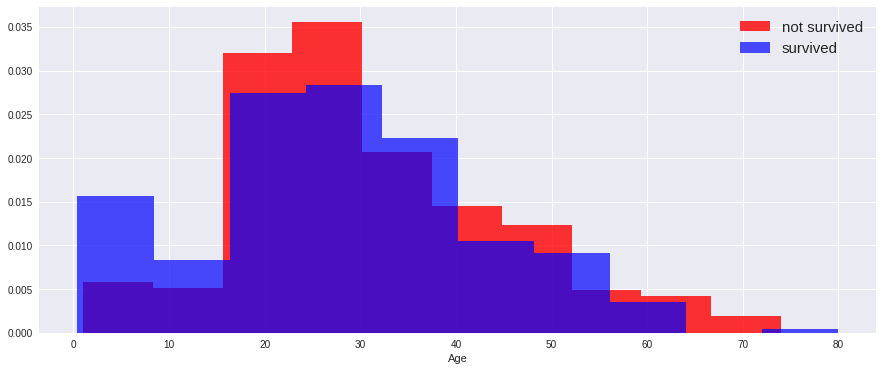

In [22]:
plt.figure(figsize=(15,6))
plt.hist(train_data_sub2.Age[train_data_sub2.Survived == 0], normed=True, bins=10, alpha=0.8, color='red', label='not survived')
plt.hist(train_data_sub2.Age[train_data_sub2.Survived == 1], normed=True, bins=10, alpha=0.7, color='blue', label='survived')
plt.grid(True)
plt.legend(loc='best', fontsize=15)
plt.xlabel('Age')

In [23]:
dummy_train = pd.get_dummies(train_data_sub2[['Sex', 'Embarked']])
dummy_train.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [24]:
train_data_sub3 = pd.concat([train_data_sub2.drop(['Sex', 'Embarked'], axis=1), dummy_train], axis=1)
train_data_sub3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [0]:
test_data_sub1 = test_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
dummy_test = pd.get_dummies(test_data_sub1[['Sex', 'Embarked']])
test_data_sub2 = pd.concat([test_data_sub1.drop(['Sex', 'Embarked'], axis=1), dummy_test], axis=1)

In [26]:
X_train = train_data_sub3.drop('Survived', axis=1)
y_train = train_data_sub3.Survived

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
bench_mark = train_data_sub3.Survived.sum() / train_data_sub3.Survived.count()

print("bench_mark : ", bench_mark)
print("training score : ", log_reg.score(X_train, y_train))

bench_mark :  0.4044943820224719
training score :  0.7991573033707865


In [0]:
df = pd.DataFrame(test_data.PassengerId)

In [35]:
feature_coef = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(log_reg.coef_[0, :])], axis=1)
feature_coef.columns = ['feature name', 'coefficient']
feature_coef['abs_coefficient'] = abs(feature_coef.coefficient)
feature_coef.sort_values(by='abs_coefficient', ascending=False).drop('abs_coefficient', axis=1)

,feature name,coefficient
5,Sex_female,2.138531
0,Pclass,-1.022557
7,Embarked_C,0.988450
9,Embarked_S,0.614241
6,Sex_male,-0.383123
2,SibSp,-0.328811
8,Embarked_Q,0.152718
3,Parch,-0.060702
1,Age,-0.036573
4,Fare,0.002836


In [0]:
test_data_sub2.Age = test_data_sub2.fillna(test_data_sub2.Age.mean())
test_data_sub2.Fare = test_data_sub2.fillna(test_data_sub2.Fare.mean())

In [30]:
survived_predict = log_reg.predict(test_data_sub2)
survived_predict[:5]

array([0, 1, 0, 0, 1])

In [0]:
submit = pd.concat([pd.DataFrame(test_data.PassengerId), pd.DataFrame(survived_predict)], axis=1)
submit_file.columns = ['PassengerId', 'Survived']
submit_file.to_csv('submit.csv', index=False)

In [37]:
pwd

'/content'

In [38]:
dir

<function dir>

In [39]:
ls -a

./   .cache/   datalab/   .ipython/  .rnd            test.csv
../  .config/  .forever/  .local/    submittion.csv  train.csv


In [0]:
from google.colab import files

files.download('submittion.csv')